In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

### Import Numerical User Data

In [2]:
df = pd.read_csv('./2000/2000_num_per_user.csv', index_col=[0])

In [3]:
df.drop(index=' #LoveEllie', inplace=True)

In [4]:
df.drop(index = ['What do you use your mason jar for?', '_' ], inplace=True)

In [5]:
# df = df[['gender', 'post_followers', 'post_likes', 'post_comments']]

In [6]:
df = df[['post_followers']]

In [7]:
df.index = df.index.astype(float)

### Import category data

In [8]:
df_cat = pd.read_csv('cos_sim_cat.csv', index_col=[0])

In [9]:
df_cat.reset_index(inplace=True )

In [10]:
df_cat.head()

id         8        82       203       303       579       589       627  \
0    8  1.000000  0.258199  0.654654  0.774597  0.408248  0.666667  1.000000   
1   82  0.258199  1.000000  0.338062  0.400000  0.316228  0.000000  0.258199   
2  203  0.654654  0.338062  1.000000  0.676123  0.534522  0.436436  0.654654   
3  303  0.774597  0.400000  0.676123  1.000000  0.632456  0.516398  0.774597   
4  579  0.408248  0.316228  0.534522  0.632456  1.000000  0.204124  0.408248   

        659       677  ...      9810      9811      9824      9838      9879  \
0  0.480384  0.666667  ...  0.547723  0.666667  0.577350  0.408248  0.577350   
1  0.496139  0.000000  ...  0.424264  0.258199  0.223607  0.316228  0.298142   
2  0.628971  0.654654  ...  0.597614  0.654654  0.566947  0.267261  0.629941   
3  0.620174  0.774597  ...  0.565685  0.774597  0.670820  0.316228  0.596285   
4  0.686406  0.408248  ...  0.559017  0.408248  0.353553  0.250000  0.589256   

       9911      9957      9965      9987    _  
0  0.577350  0.774597  0.333333  0.333333  0.0  
1  0.223607  0.200000  0.258199  0.258199  0.0  
2  0.377964  0.507093  0.218218  0.218218  0.0  
3  0.447214  0.600000  0.258199  0.258199  0.0  
4  0.353553  0.316228  0.204124  0.204124  0.0  

[5 rows x 2004 columns]

### Import NLP Vectorized data

In [11]:
df_text_similarity = pd.read_csv('./2000/2000_similarity_index.csv', index_col=[0])

In [12]:
df_text_similarity.drop(index=' #LoveEllie', inplace=True)

In [13]:
df_text_similarity.drop(columns=' #LoveEllie', inplace=True)

In [14]:
df_text_similarity = df_text_similarity.astype(dtype='float')

In [15]:
df_text_similarity.reset_index(inplace=True, )

In [16]:
df_text_similarity.rename(index=str, columns={'index': "id"}, inplace=True)

### Import Image Data

In [17]:
df_image_similarity = pd.read_csv('./2000/2000_cos_sim_images.csv', index_col=[0])

In [18]:
df_image_similarity = df_image_similarity.astype(dtype='float')

In [19]:
df_image_similarity.reset_index(inplace=True )

In [20]:
df_image_similarity.rename(index=str, columns={'index': "id"}, inplace=True)

In [34]:
df_img = pd.read_csv('per_post_image.csv')

## Cosine Similarity

The final reccomendation will combine the all values and perform a cosine similarity measurement to determine the users closest across all dimensions. 

In [22]:
# scaler = MinMaxScaler()
# scaled_df = scaler.fit_transform(df.astype(float))

Convert the scaled_df into an actual df

In [23]:
# df2 = pd.DataFrame(df)
# df2.index = df.index
# df2.columns = ['gender','post_followers', 'post_likes', 'post_comments']
# df2.df.'post_followers']

In [24]:
df.head()

post_followers
id                   
8.0           55937.0
82.0          51288.0
203.0        408061.0
303.0         50129.0
579.0        232281.0

In [41]:
def recomend(user, qty_of_results, follower_min, follower_max):
    #try:
        df3 = pd.DataFrame(df, copy=True)
        df3.reset_index(inplace=True)
        df3.id = df3.id.astype(int)
#         df3.post_likes = df3.post_likes.multiply(1)
        df3 = pd.merge(df3, df_text_similarity[['id', str(user)]], how='left', on='id')
        df3 = pd.merge(df3, df_cat[['id', str(user)]], how='left', on='id', suffixes=('_text', '_cat'))
        df4 = pd.merge(df3, df_image_similarity[['id', str(user)]], how='left', on='id')
        df4.fillna(0, inplace=True)
#         df4[str(user)+'_text'] = df4[str(user)+'_text'].multiply(10)
#         df4[str(user)+'_cat'] = df4[str(user)+'_cat'].multiply(10)
#         df4[str(user)] = df4[str(user)].multiply(10)
#         df4['post_followers'] = df4['post_followers'].multiply(100)
#         df4.gender = df4.gender.multiply(1)
#         row = list(df4.id).index(user)
#         df4.set_index('id', inplace=True)
#         df4['temp_cos_results'] = (cosine_similarity(df4)[row])
        df4['temp_sum_results'] = df4.iloc[:, [2,3,4]].sum(axis=1)
        #df5 = pd.merge(df, df4[[str(user)+'_text', str(user)+'_image', 'temp_cos_results']], how='left', left_index=True, right_index=True,)
        return df4[(df4.post_followers > follower_min)& (df4.post_followers < follower_max)].nlargest(n=qty_of_results, columns='temp_sum_results', keep='all')
    #except:
        #print('There is no data for user {} to compare against.'.format(user))

### Reccomend

Call the reccomend function with a user to view a list of the closets users. 

In [44]:
rec = recomend(82, 20, 50000, 200000)

In [45]:
rec

id  post_followers   82_text    82_cat        82  temp_sum_results
1        82         51288.0  1.000000  1.000000  1.000000          3.000000
571   63937        102521.0  0.940088  0.559017  0.798490          2.297595
1541  57378         60947.0  0.960149  0.516398  0.778067          2.254613
1120  29933         53056.0  0.916694  0.474342  0.771425          2.162461
515   59189        101161.0  0.978517  0.632456  0.534470          2.145443
1624  61188        169873.0  0.766062  0.516398  0.789898          2.072358
126    8679        162091.0  0.691694  0.565685  0.758745          2.016125
545   61415         57406.0  0.967178  0.365148  0.656532          1.988858
40     2697        110594.0  0.965042  0.316228  0.705642          1.986912
1601  60085        104906.0  0.957644  0.632456  0.386821          1.976921
236   17069         92784.0  0.960829  0.447214  0.540453          1.948495
480   56040         51266.0  0.953817  0.596285  0.395904          1.946005
251   18389        134626.0  0.905698  0.316228  0.714742          1.936668
259   18993        103425.0  0.867184  0.447214  0.607530          1.921928
365   37331         90970.0  0.958625  0.223607  0.726135          1.908367
58     4054         77851.0  0.968747  0.223607  0.711967          1.904321
1273  41732         63888.0  0.931440  0.223607  0.739146          1.894192
81     5620         91378.0  0.969941  0.600000  0.288177          1.858118
47     3110         73521.0  0.950944  0.258199  0.644383          1.853526
193   13370         83784.0  0.935080  0.539360  0.360097          1.834536

In [32]:
# rec.iloc[:, [1,29,30,31]]





Here are a couple of photos from user:  82


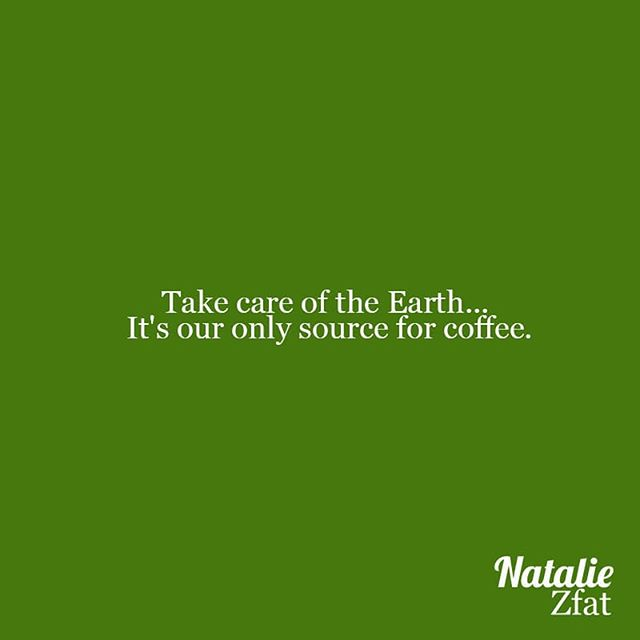

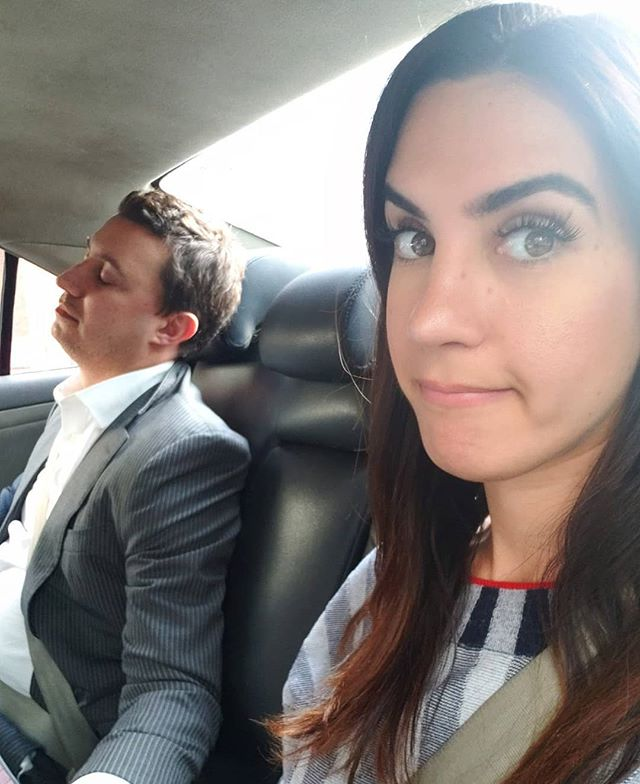

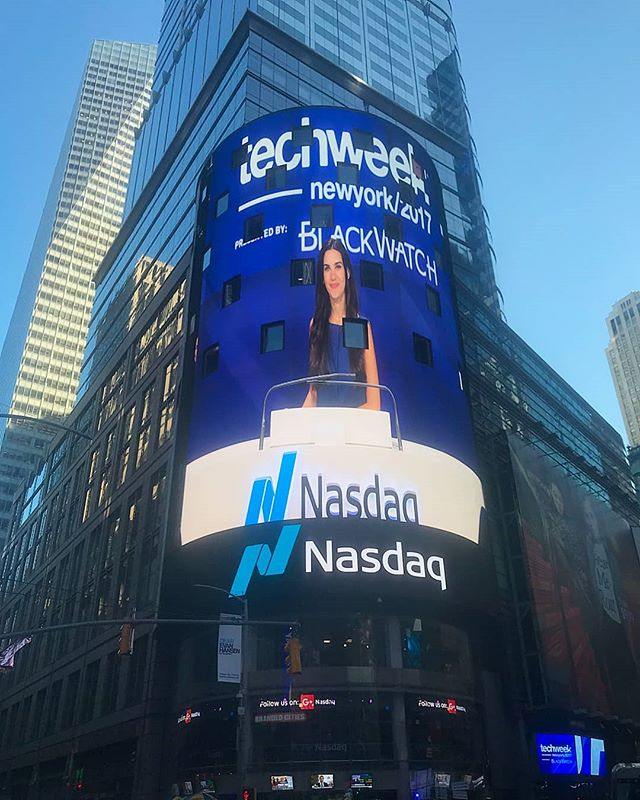





Here are a couple of photos from user:  63937


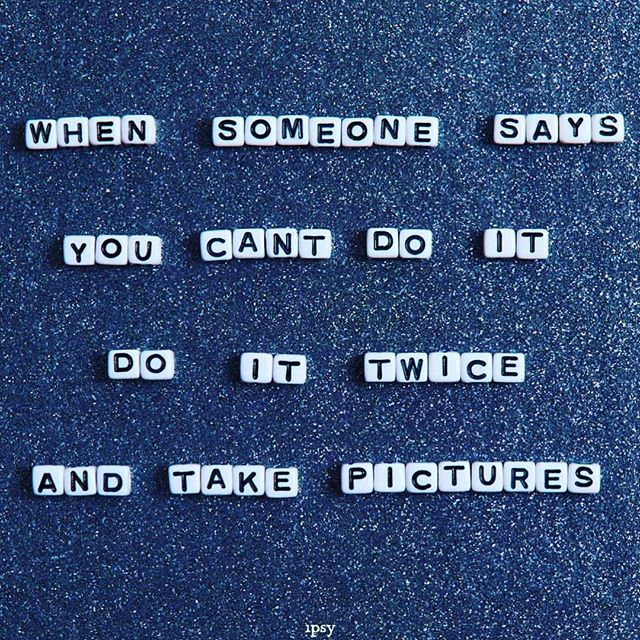

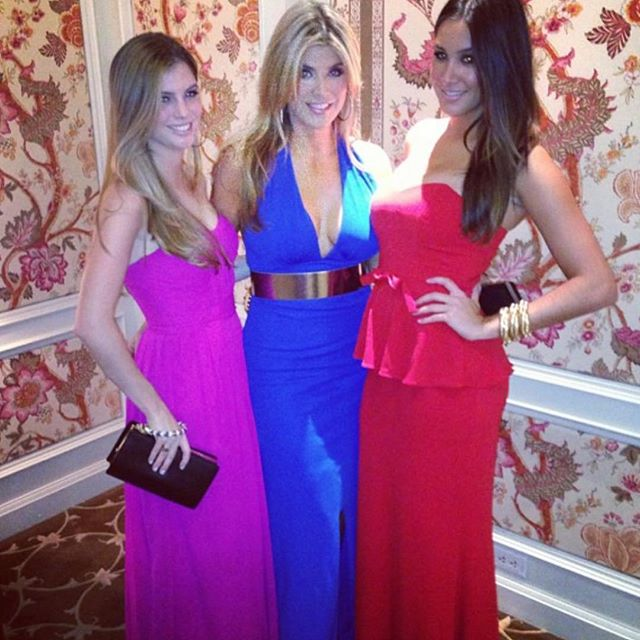

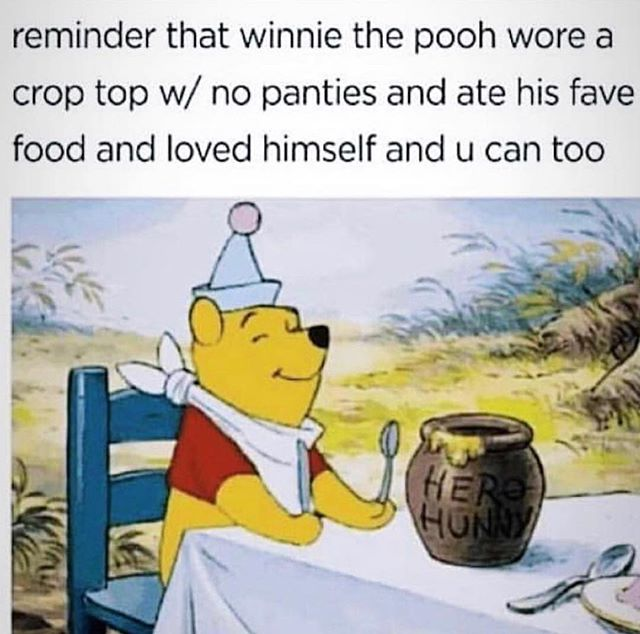





Here are a couple of photos from user:  57378


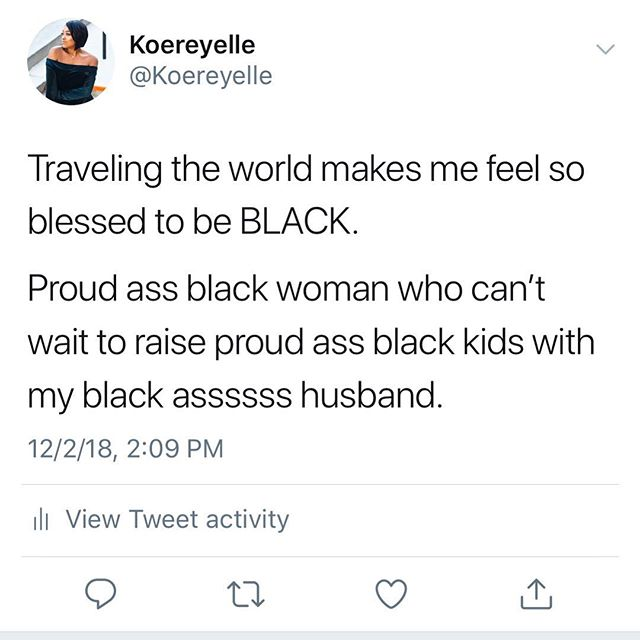

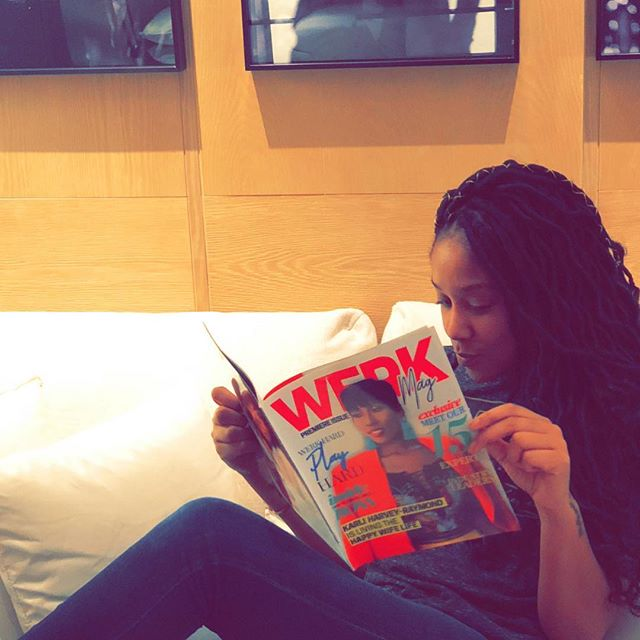

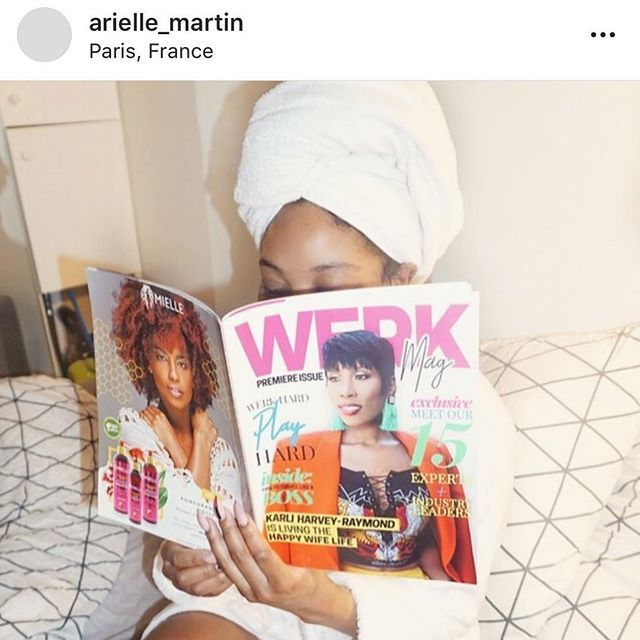





Here are a couple of photos from user:  29933


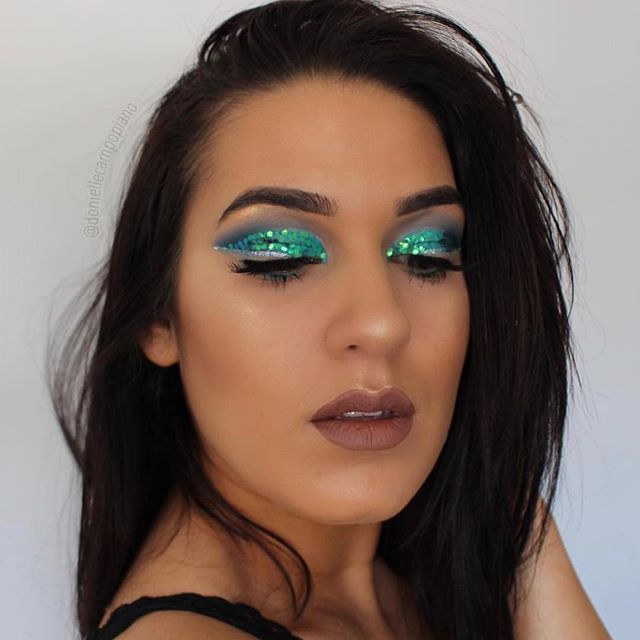

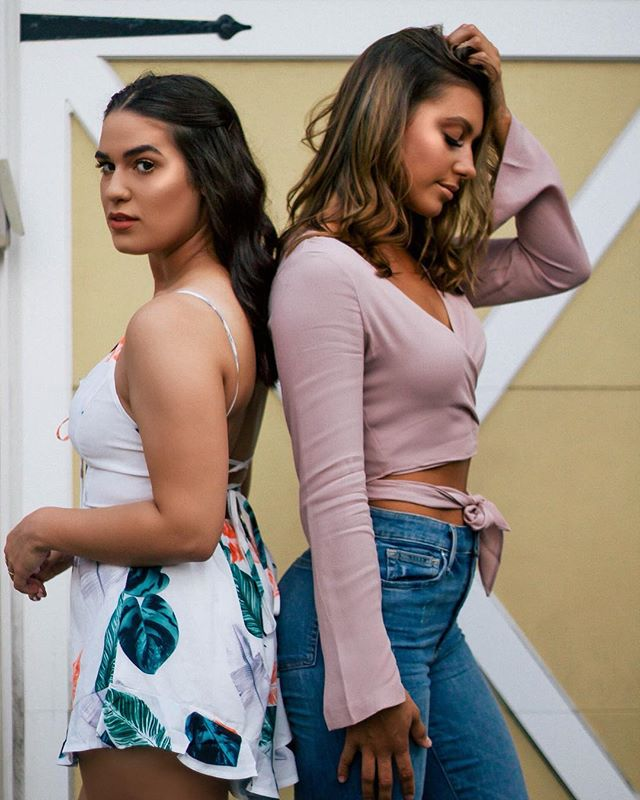

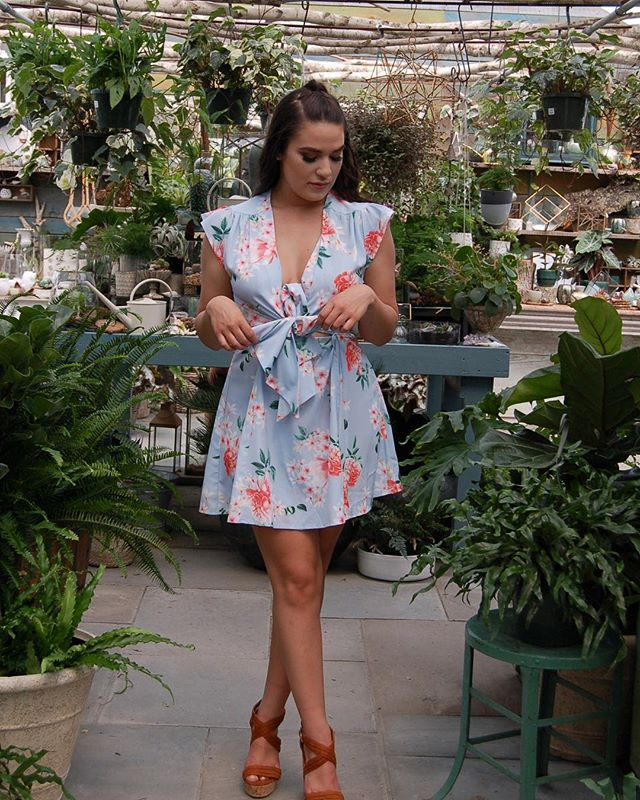





Here are a couple of photos from user:  59189


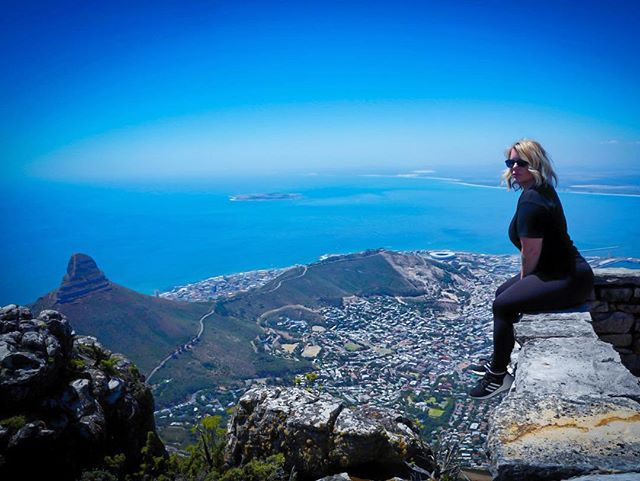

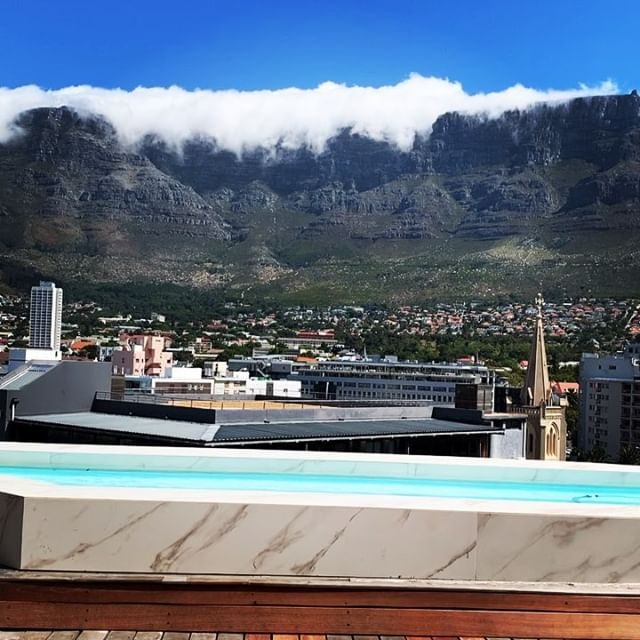

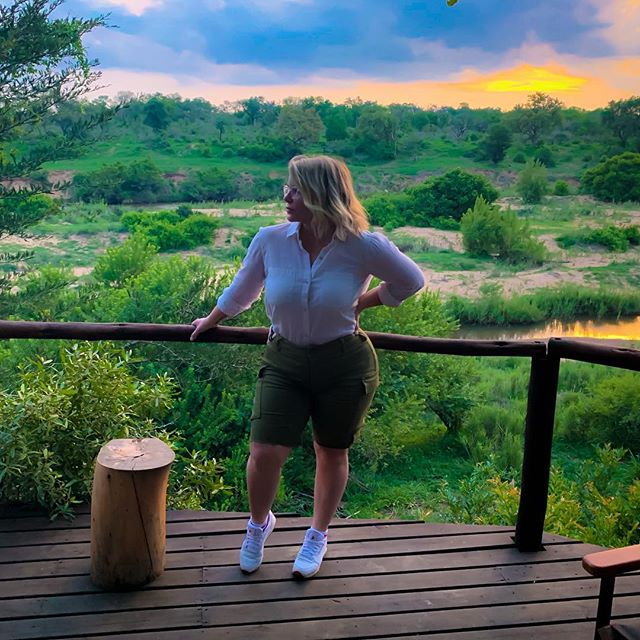





Here are a couple of photos from user:  61188


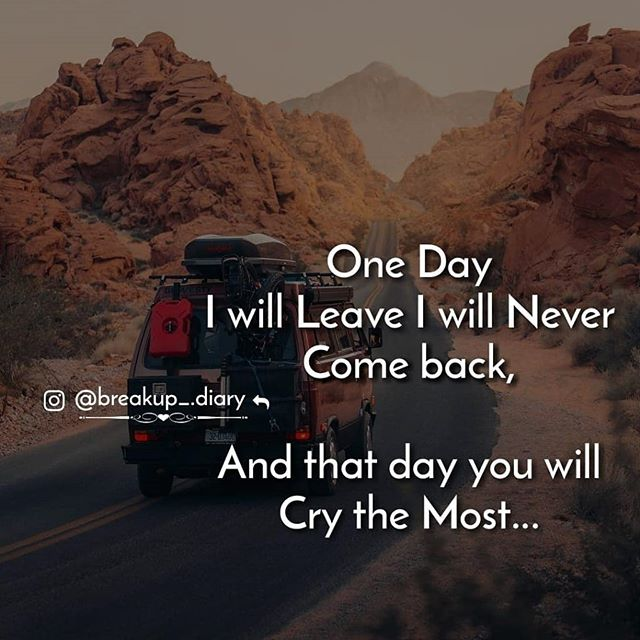

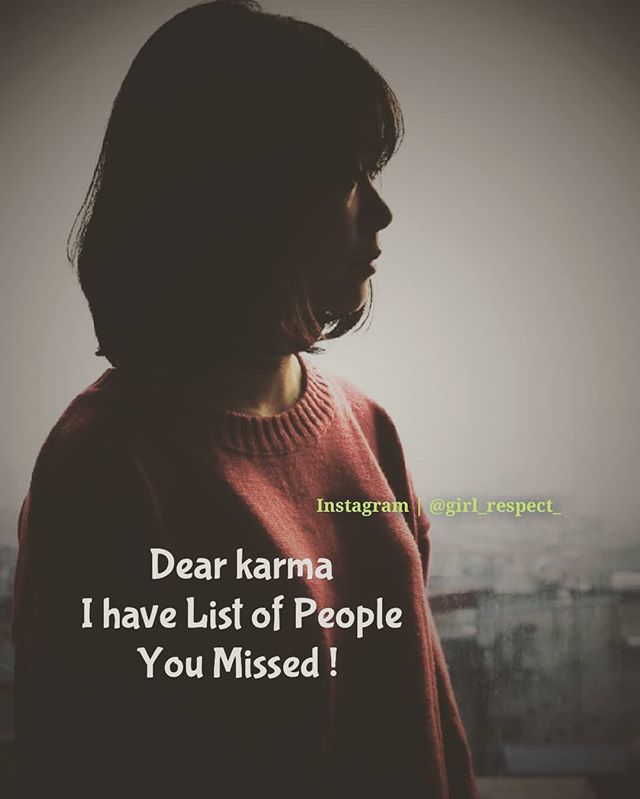

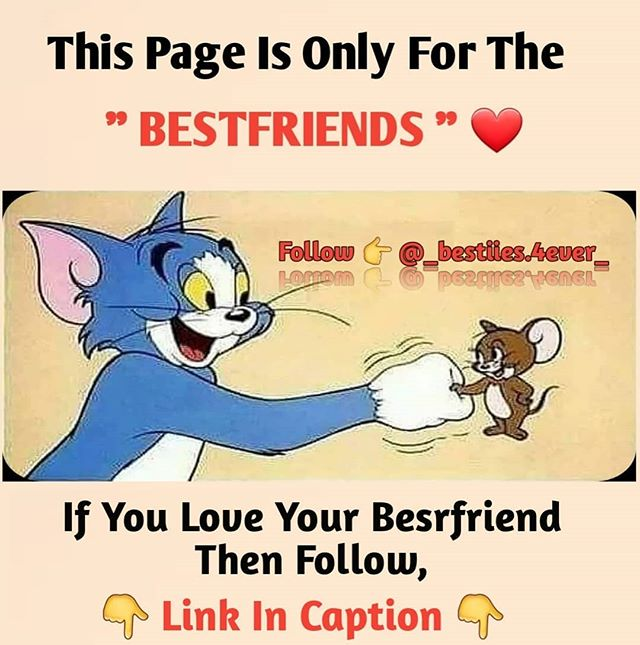





Here are a couple of photos from user:  8679


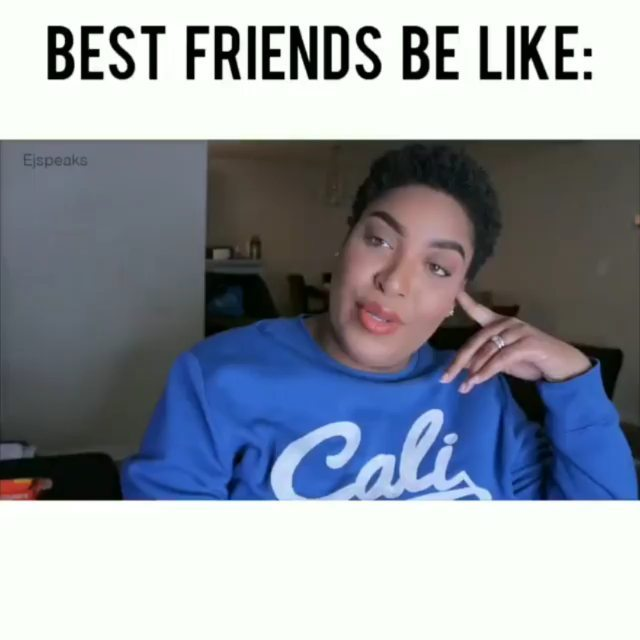

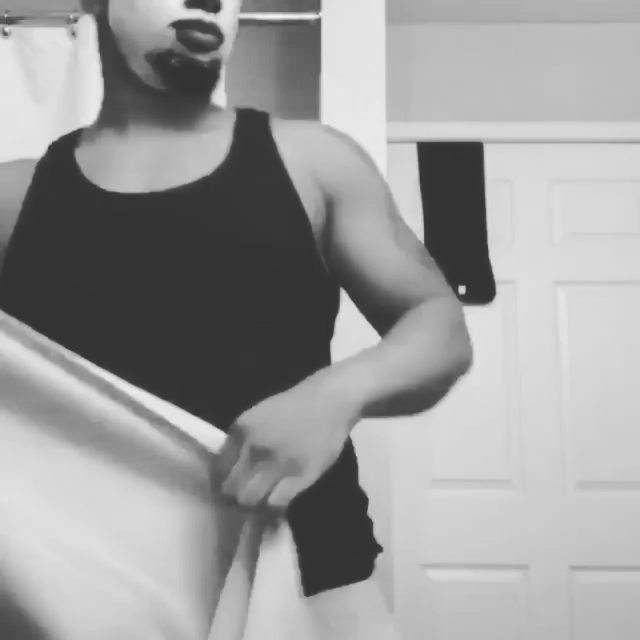

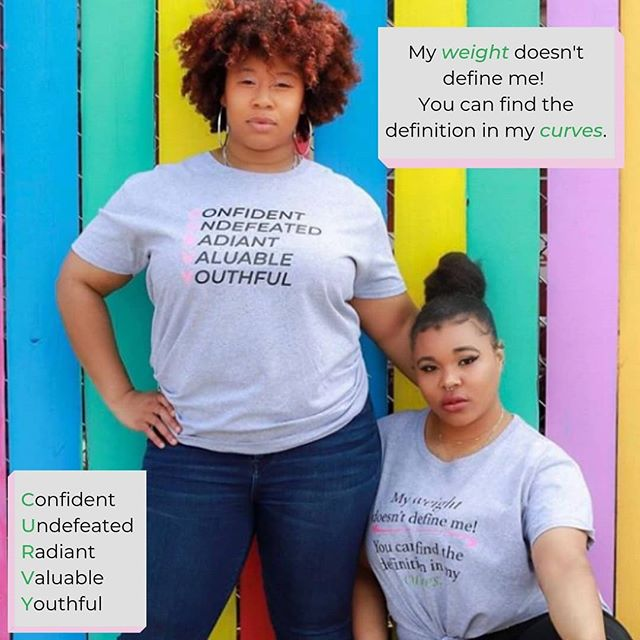





Here are a couple of photos from user:  61415


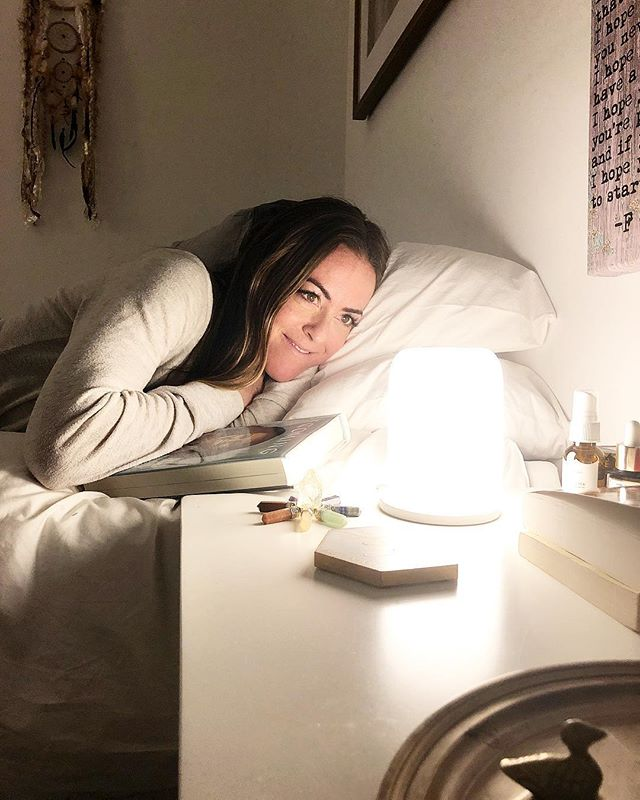

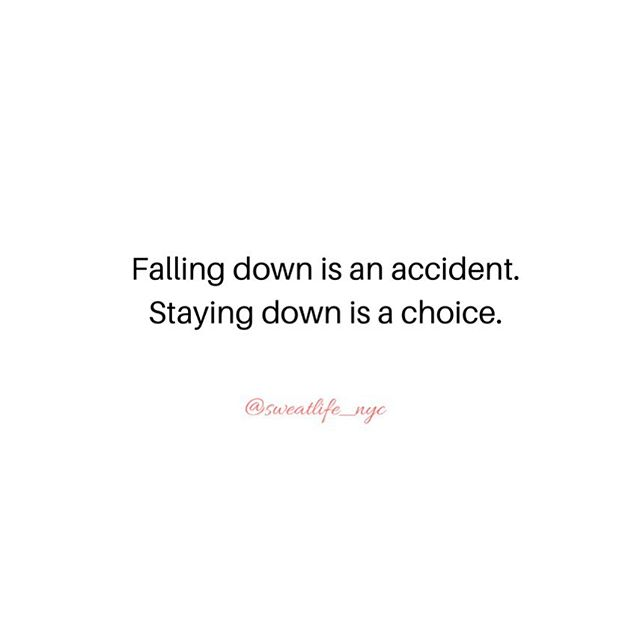

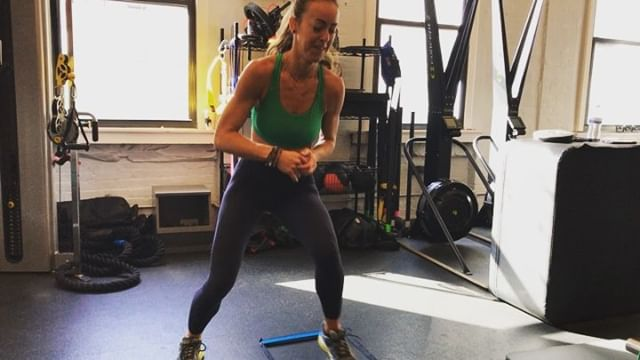





Here are a couple of photos from user:  2697


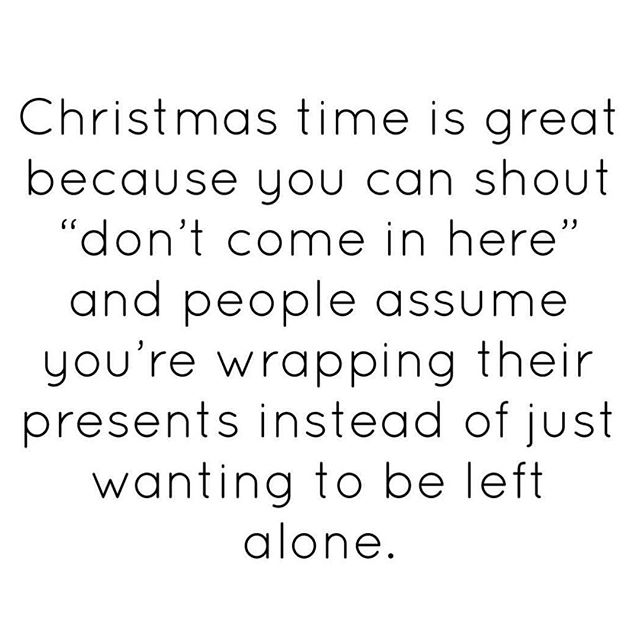

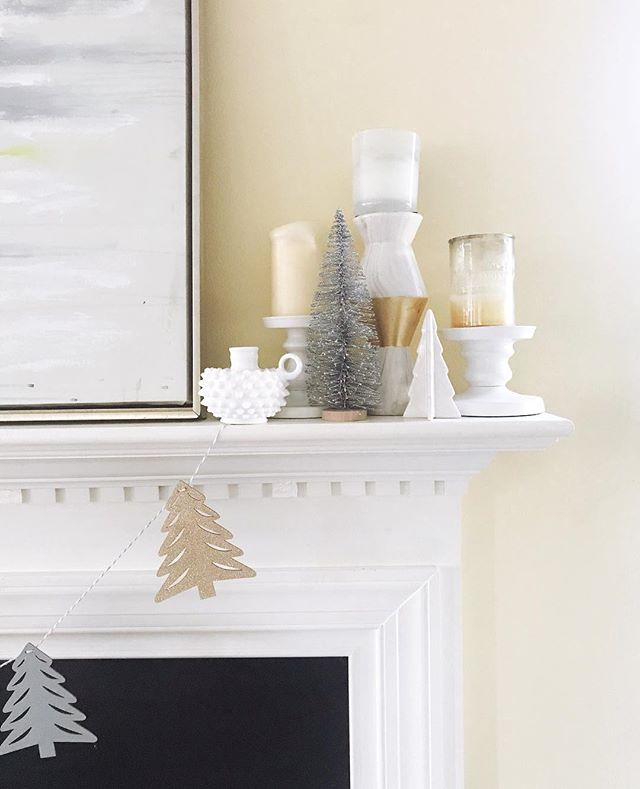

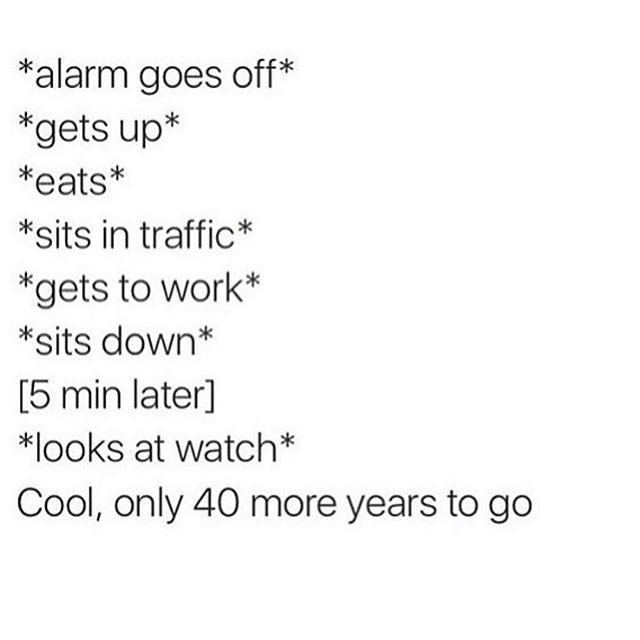





Here are a couple of photos from user:  60085


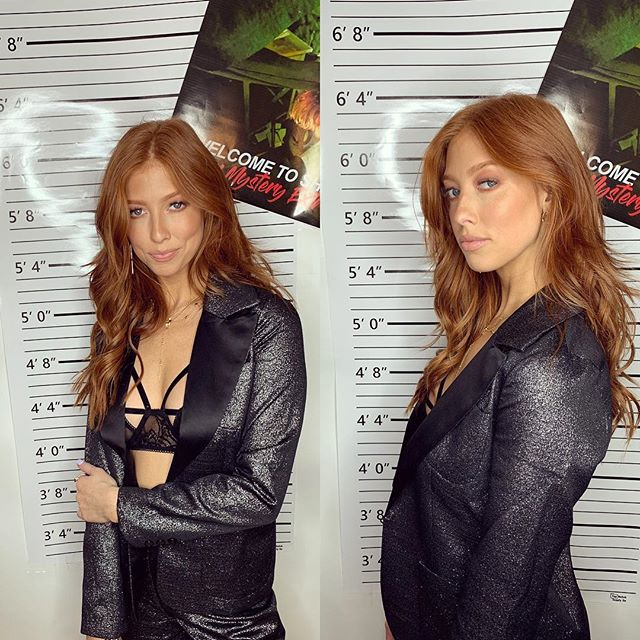

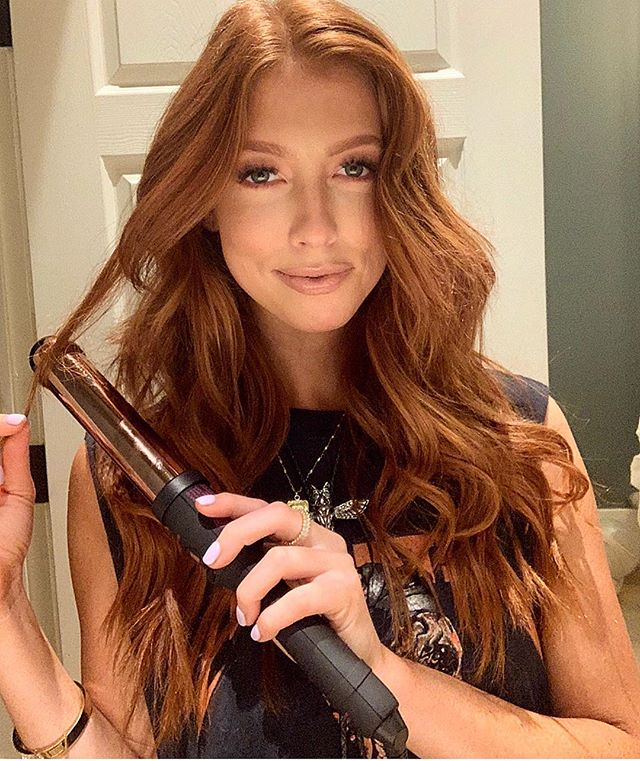

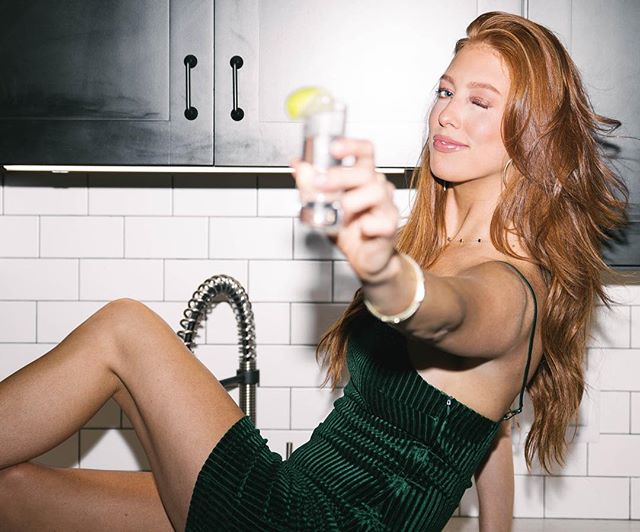





Here are a couple of photos from user:  17069


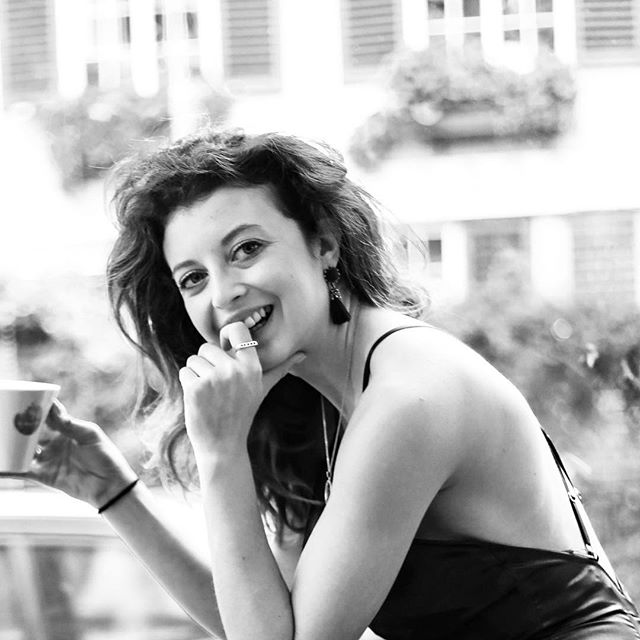

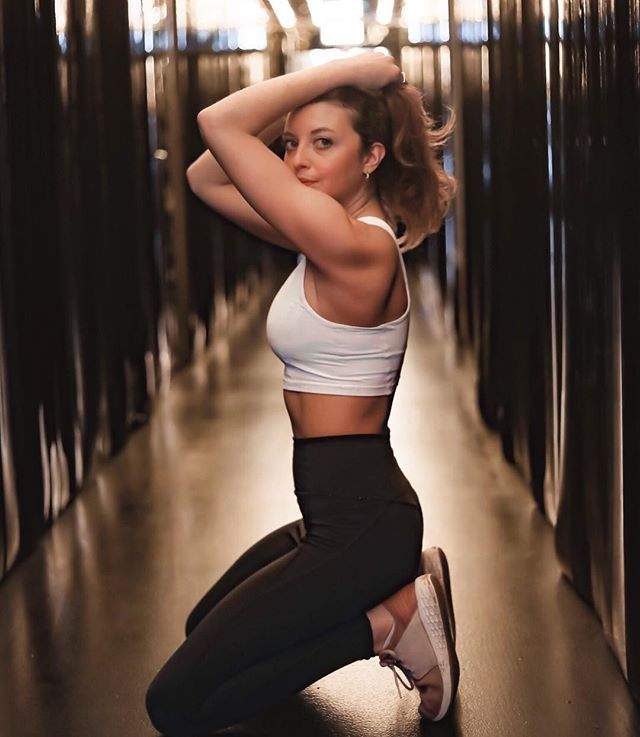

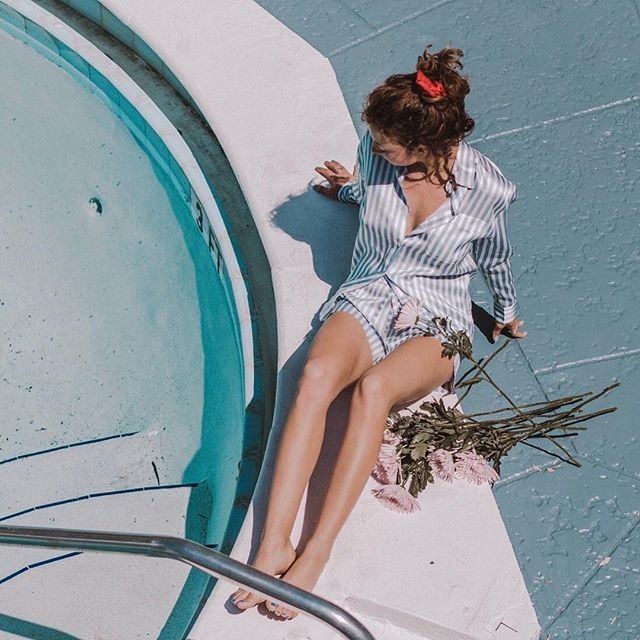





Here are a couple of photos from user:  56040


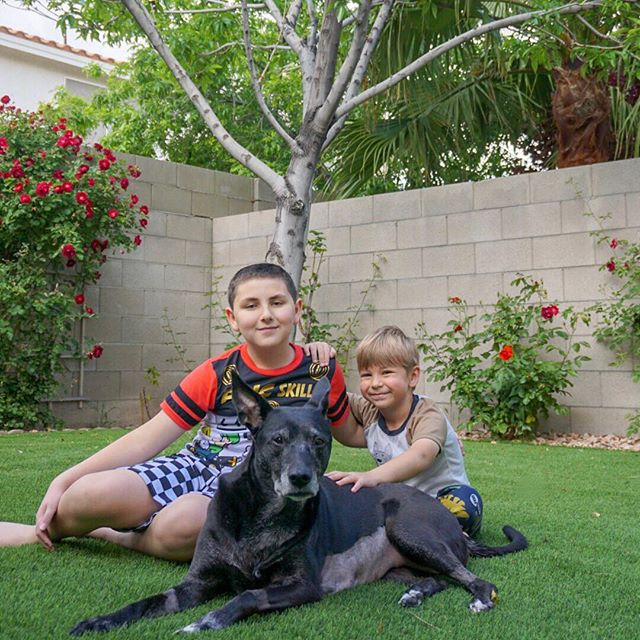

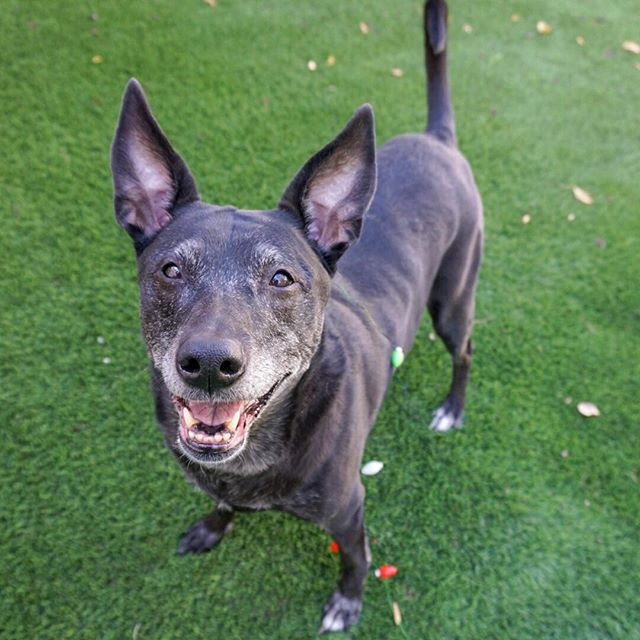

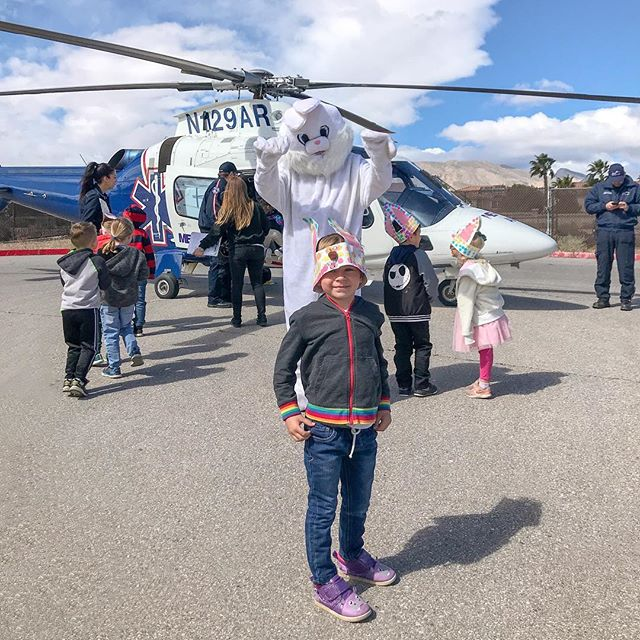





Here are a couple of photos from user:  18389


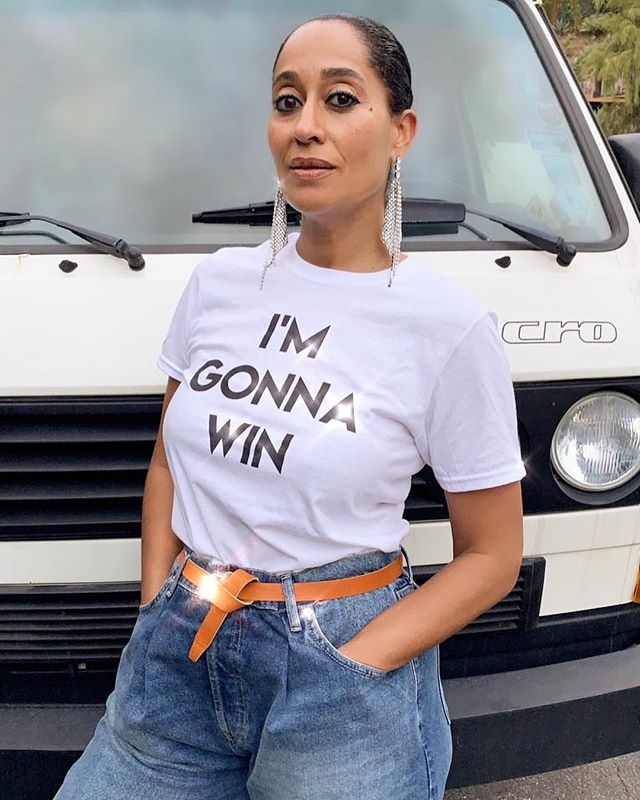

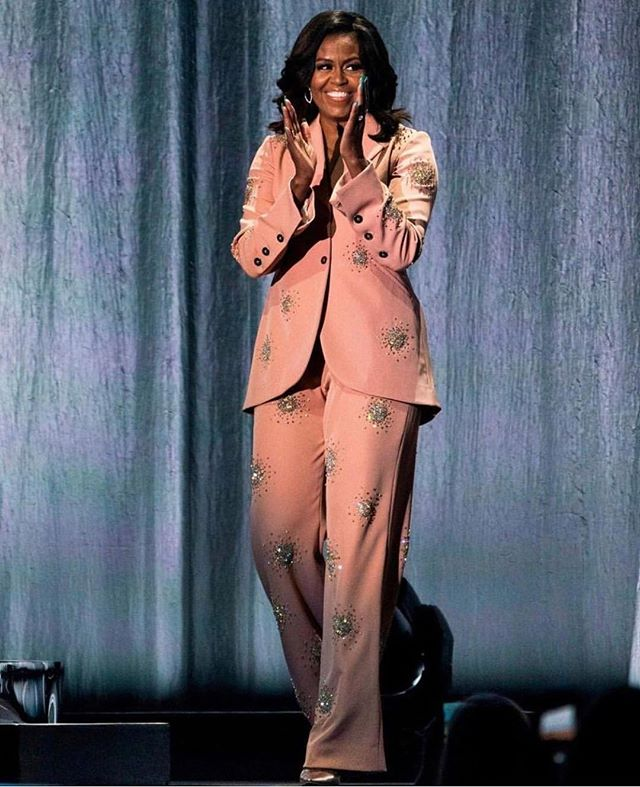

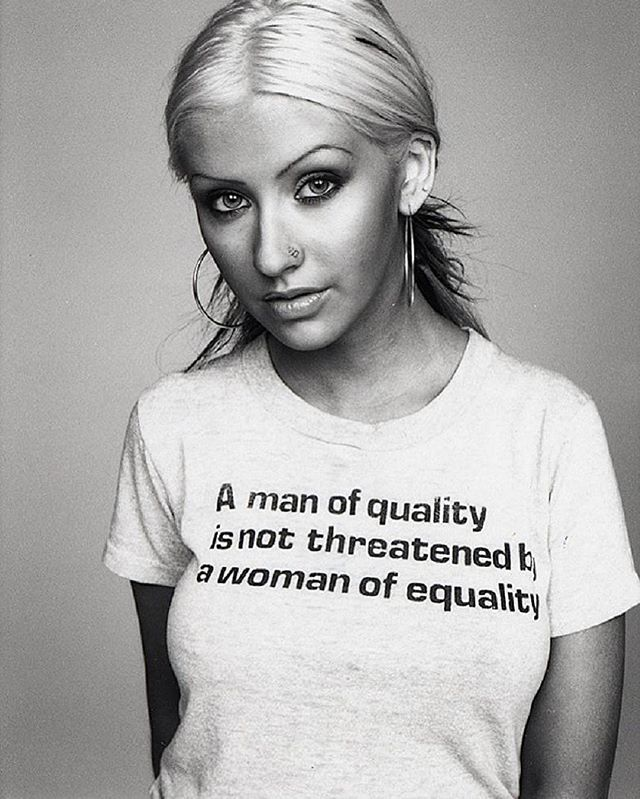





Here are a couple of photos from user:  18993


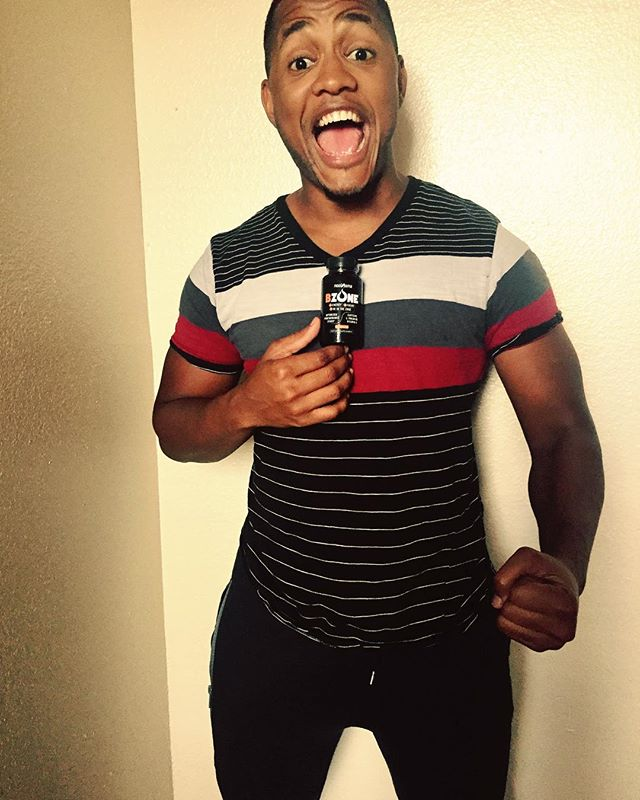

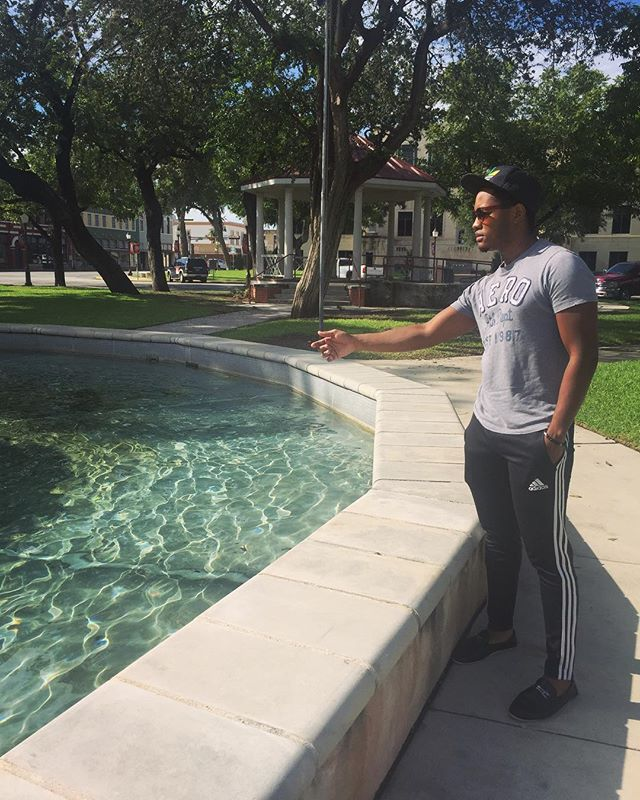

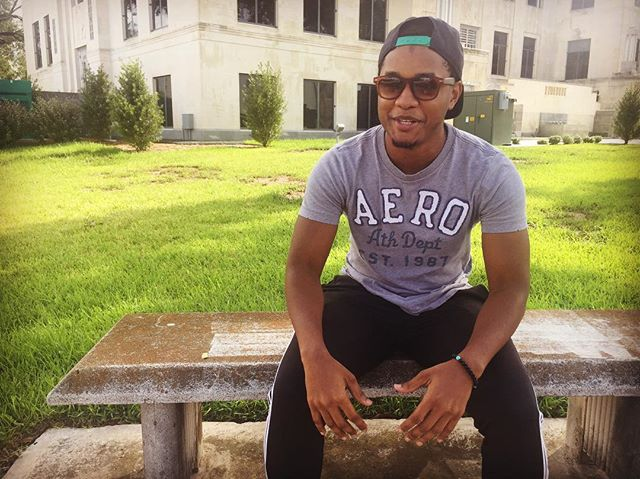





Here are a couple of photos from user:  37331


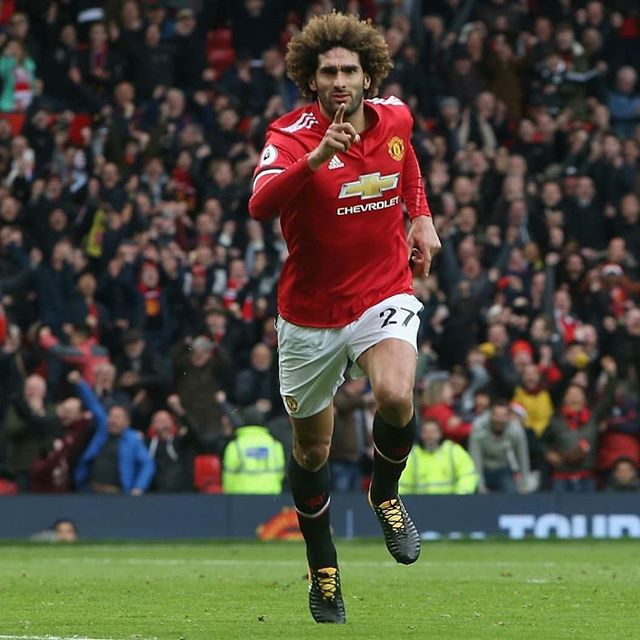

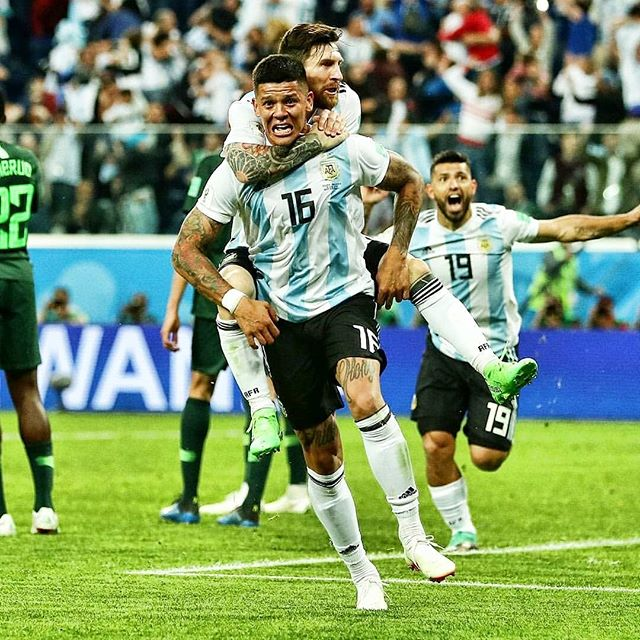

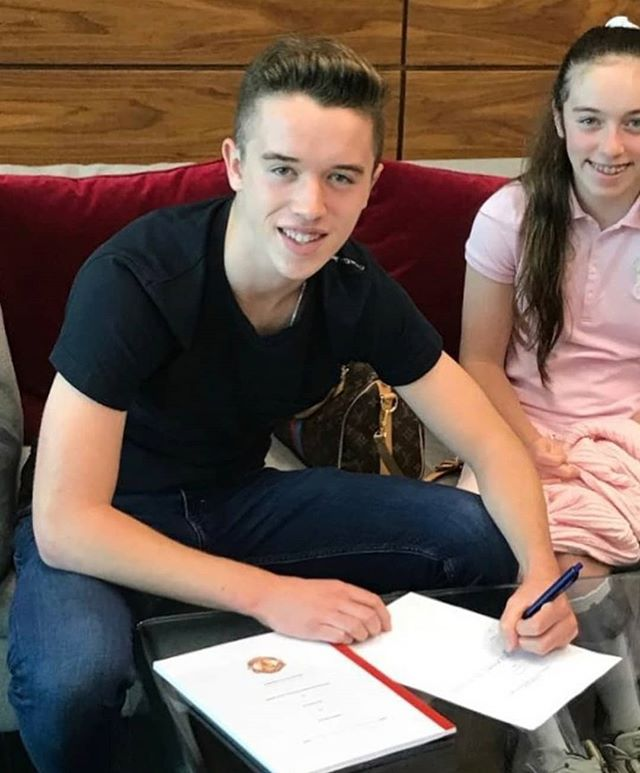





Here are a couple of photos from user:  4054


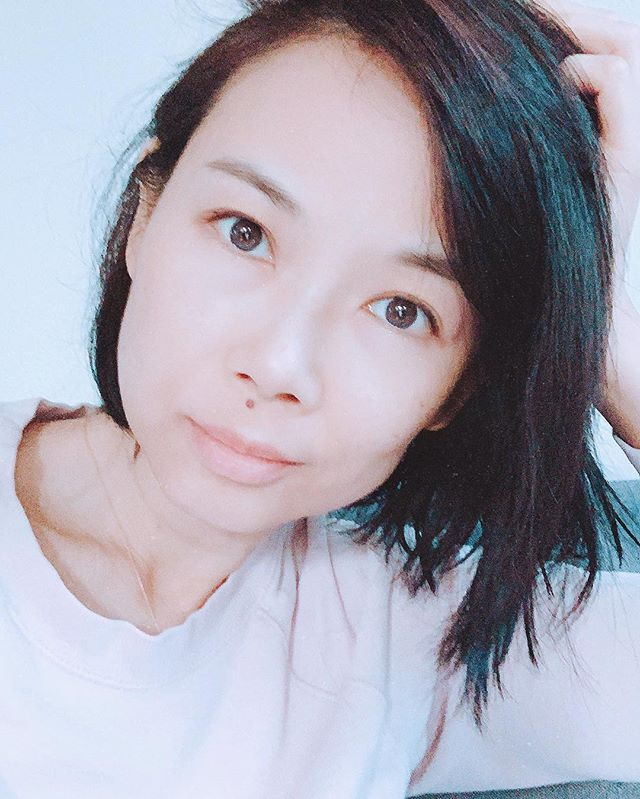

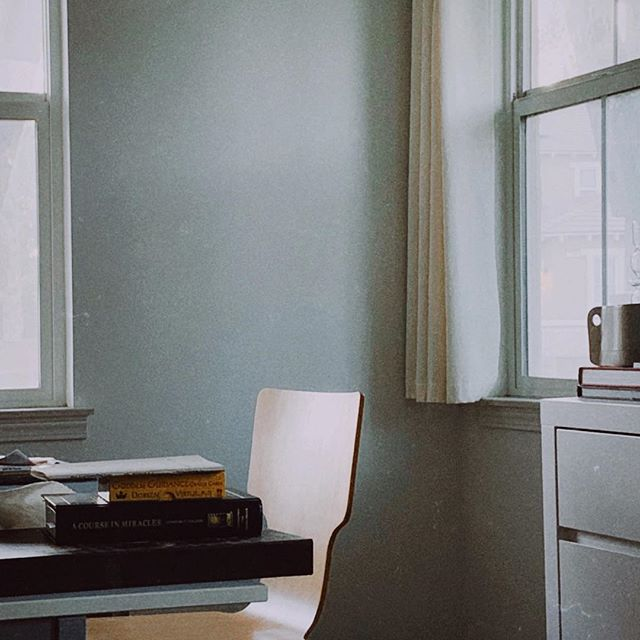

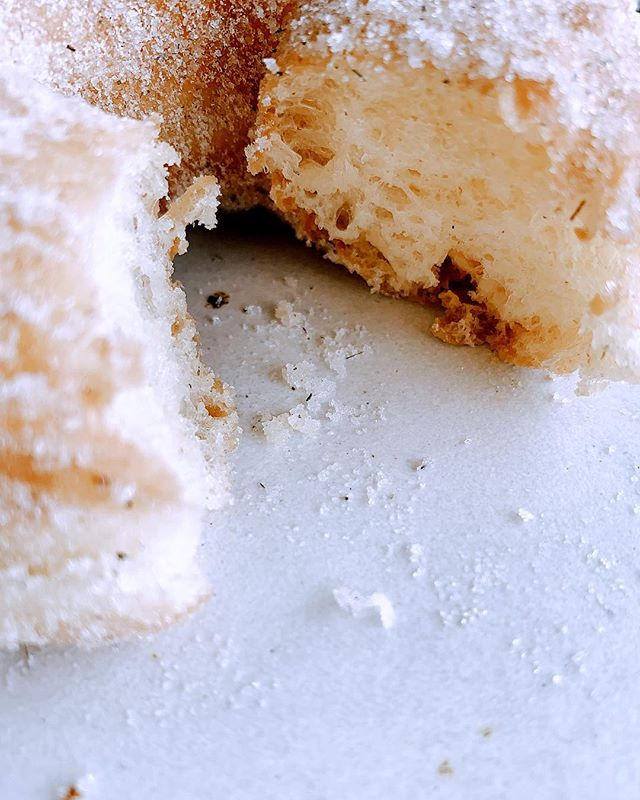





Here are a couple of photos from user:  41732


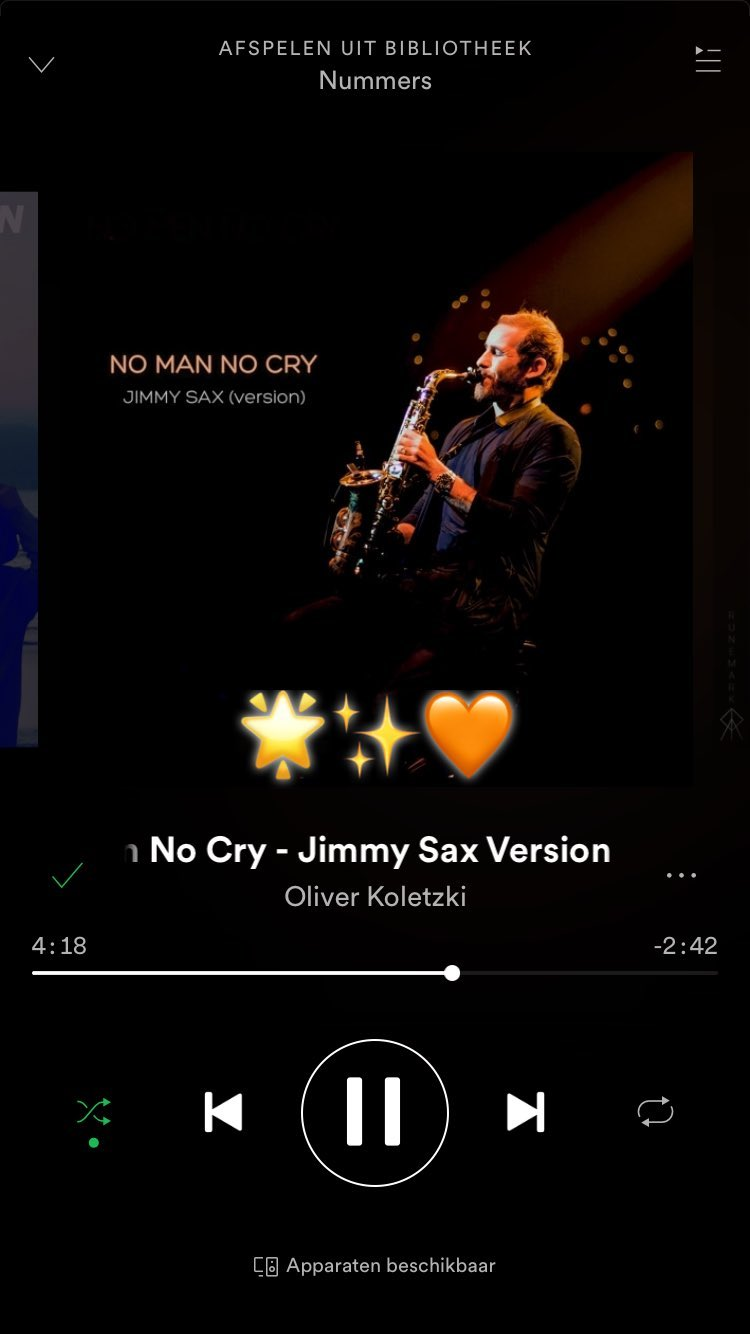

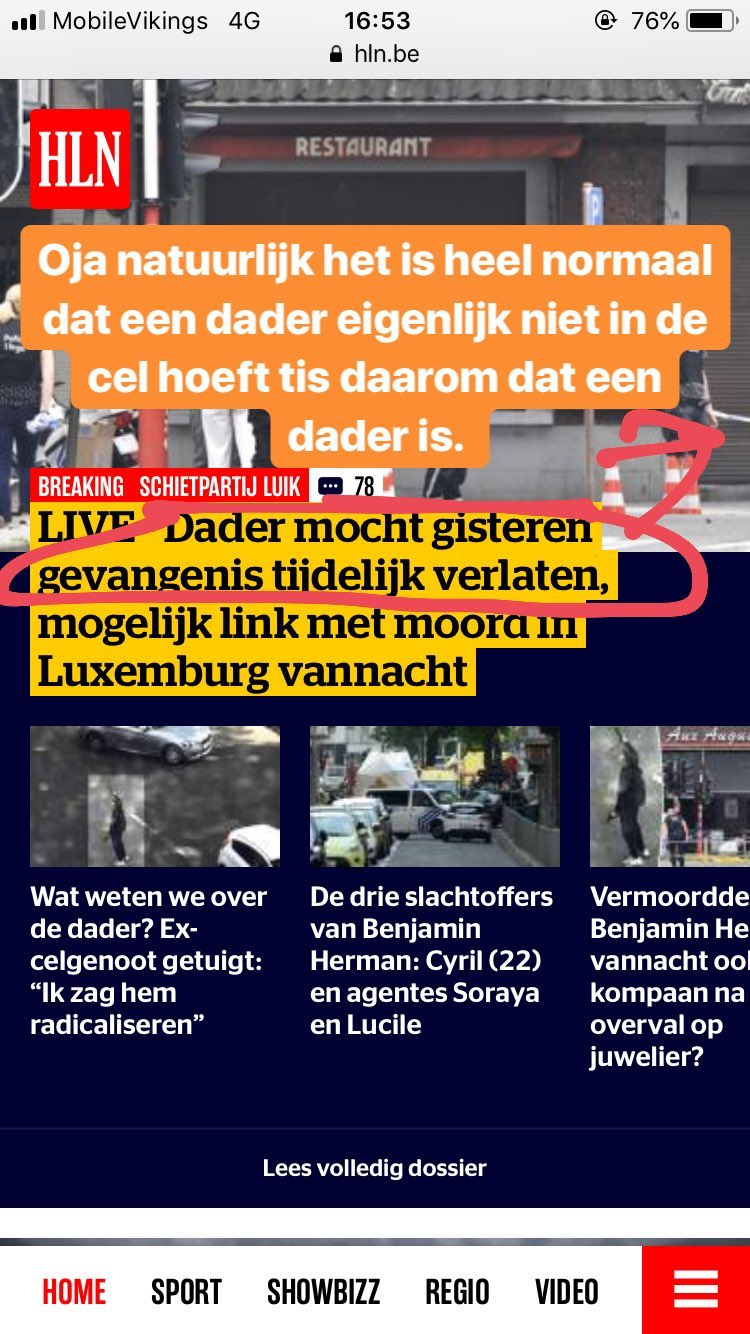

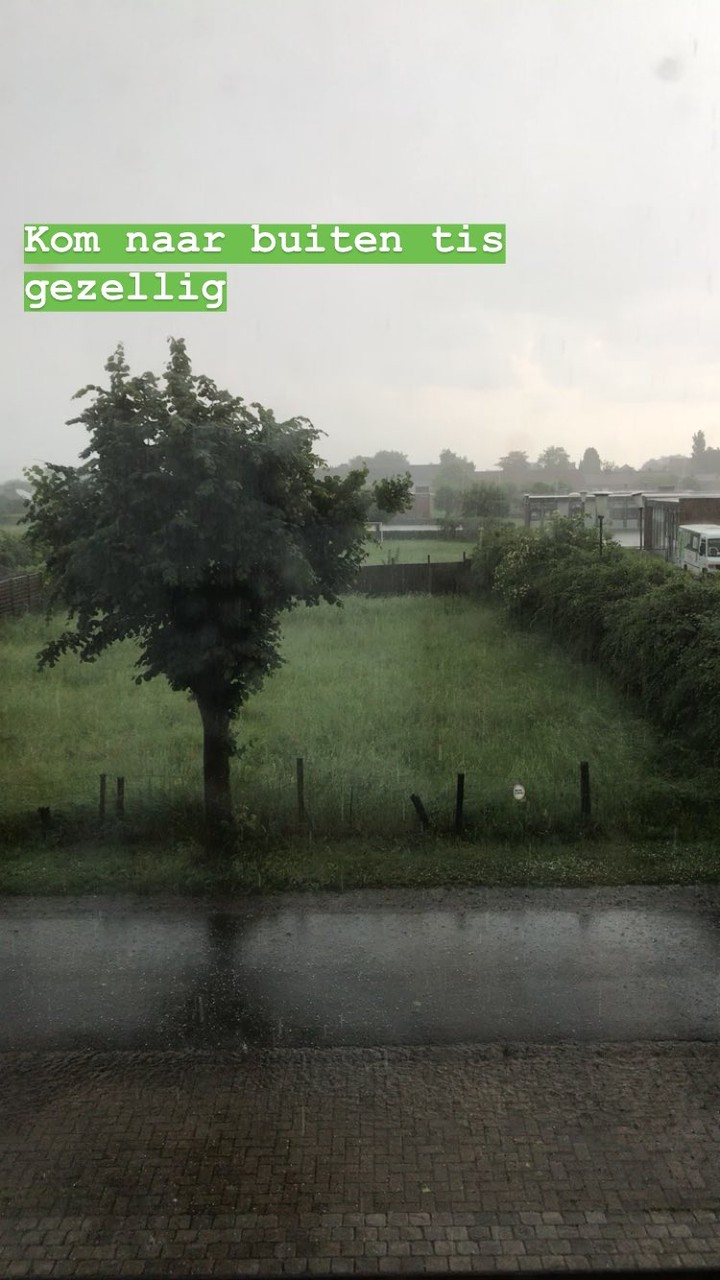





Here are a couple of photos from user:  5620


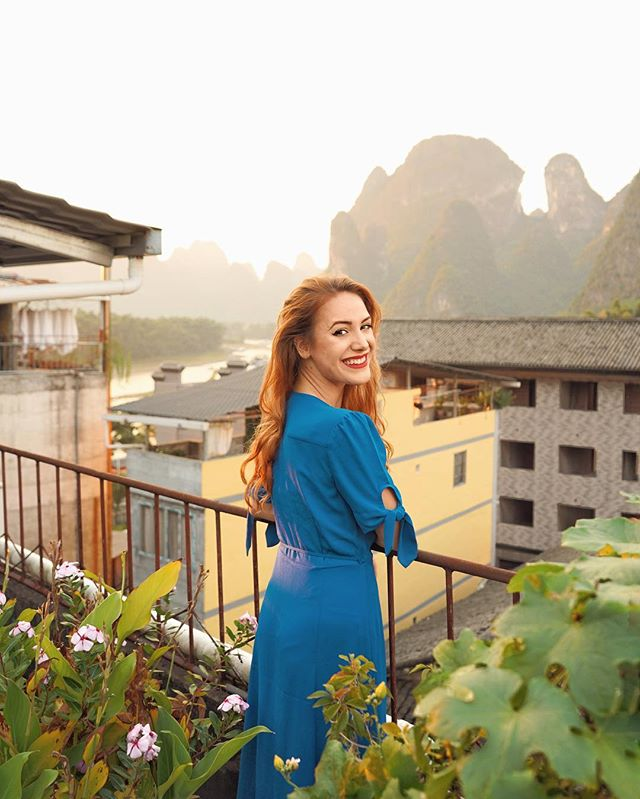

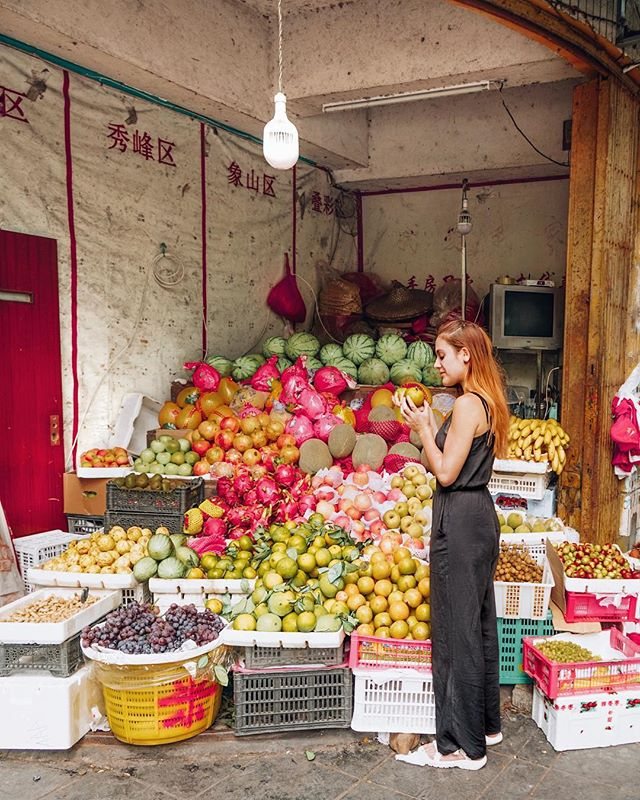

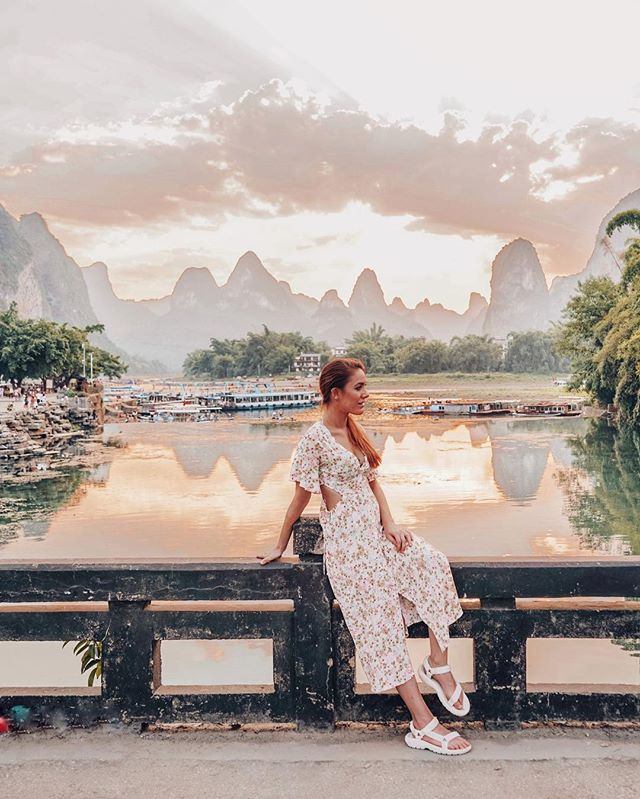





Here are a couple of photos from user:  3110


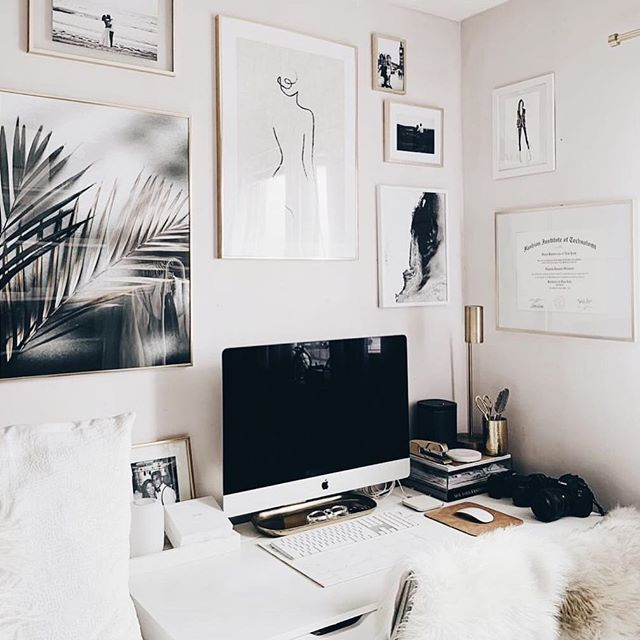

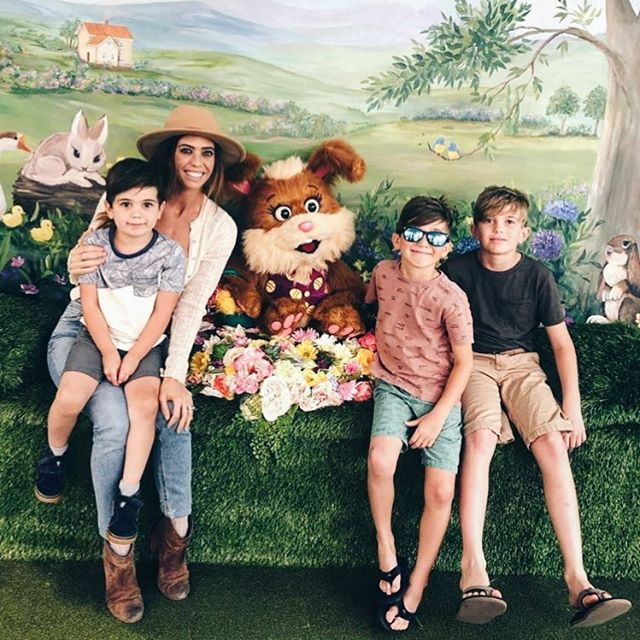

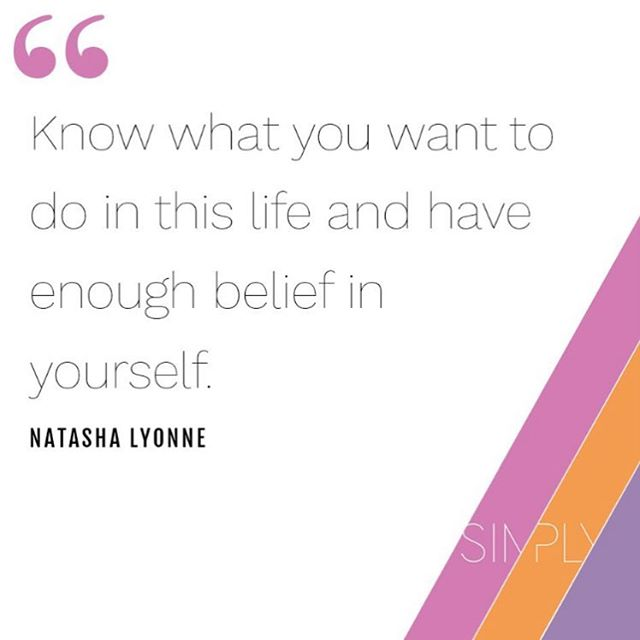





Here are a couple of photos from user:  13370


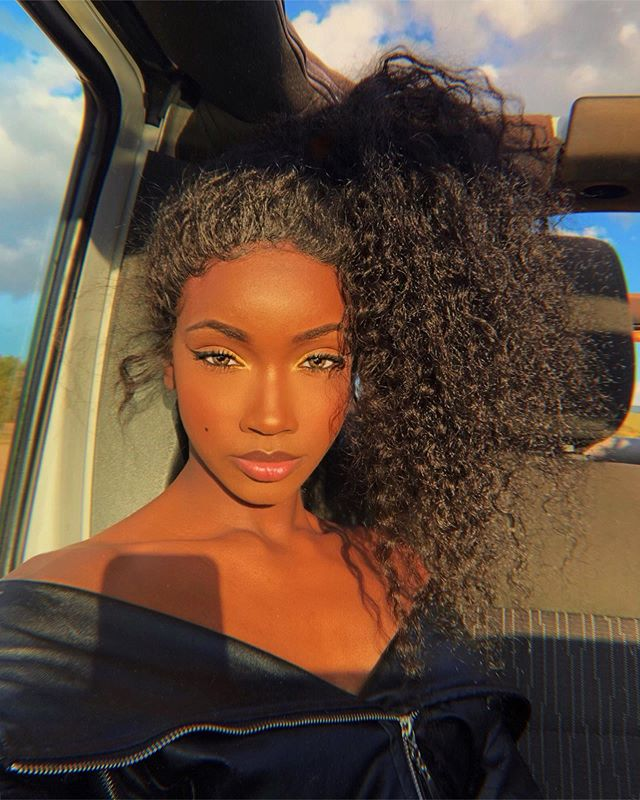

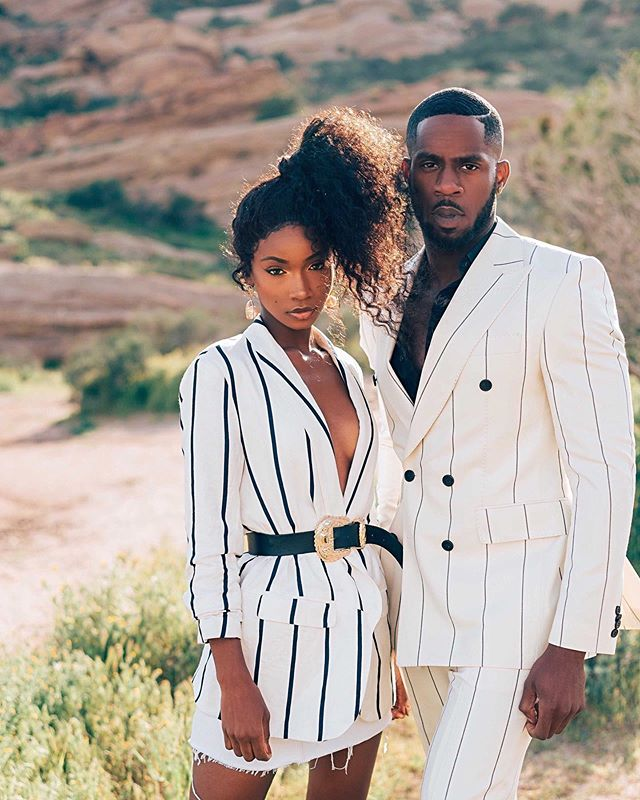

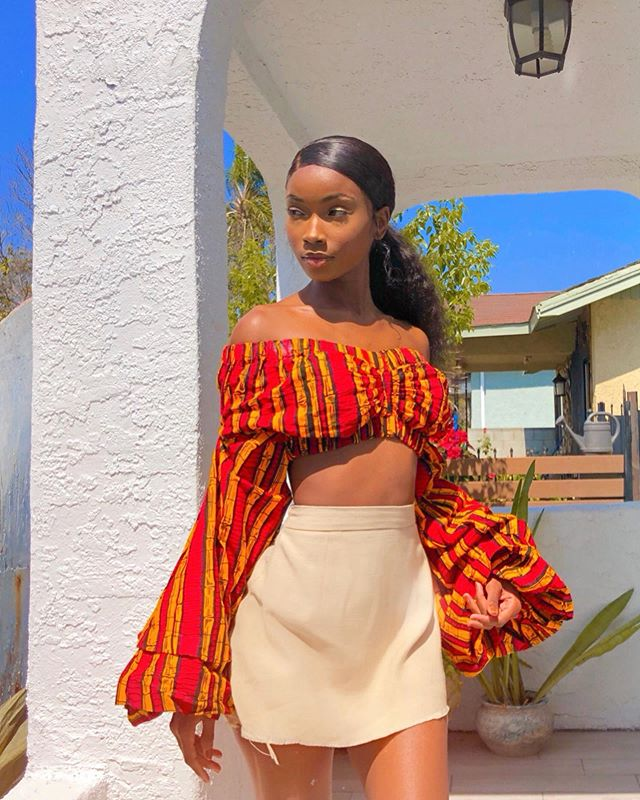

In [47]:
rec_list = rec.id
for x in rec_list:
    print('\n\n\n\nHere are a couple of photos from user: ', x)
    df2  = df_img.loc[df_img['id'] == x]
    image_list = df2['image'].head(3)
    for i in image_list:
        url = i
        img = Image(url, format = 'jpeg')
        display(img)

### Test

In [ ]:
df